In [1]:
import numpy as np

# Homework 02:  Working with numbers

**1**. (10 points) 

Normalize the $3 \times 4$ diagonal matrix with diagonal (1, ,2, 3) so all rows have mean 0 and standard deviation 1. The matrix has 0 everywhere not on the diagonal.

<font color=red>This is straightforward test of matrix construction, marginalization and broadcasting</font>

In [2]:
x = np.c_[np.diag([1,2,3]), np.zeros(3)]

In [3]:
x

array([[1., 0., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 3., 0.]])

In [4]:
x_scaled = (x - x.mean(axis=1)[:, None])/x.std(axis=1)[:, None]
x_scaled

array([[ 1.73205081, -0.57735027, -0.57735027, -0.57735027],
       [-0.57735027,  1.73205081, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027,  1.73205081, -0.57735027]])

In [5]:
np.around(x_scaled.mean(axis=1))

array([-0., -0.,  0.])

In [6]:
x_scaled.std(axis=1)

array([1., 1., 1.])

**2**. (10 points) 

A fixed point of a funciton is a value that remains the same when the funciton is applied to it, that is $f(x) = x$. Write a function that finds the fixed poitn of another function $f$ given an intiial value $x_0$. For example, if

$$f(x) \rightarrow \sqrt{x}$$

and 

$x_0$ is any positive real number, then the function should return 1 since

$$\sqrt{1} = 1$$

Not all funcitons have a fixed point - if it taakes over 1,000 iterations, the fucntion shold return None.

- Use the function signature `fixed_point(f, x0, max_iter=1000)`. 
- Test with `fixed_point(np.sqrt, 10)`.

<font color=red>This tests custom function writing, use of looping and checking a floating point condition, and the use of a higher order function.</font>

In [7]:
def fixed_point(f, x0, max_iter=1000):
    """Fixed point iteration of f."""
        
    tol = 1e-12
    x = x0
    i = 0
    while np.abs(x - f(x)) > tol:
        x = f(x)
        i += 1
        if i > max_iter:
            return None
    return x

In [8]:
fixed_point(np.sqrt, 10)

1.000000000001047

**3**. (10 points) 

Use `np.fromfunction` to construc the following matrix

```python
array([[5, 0, 0, 0, 5],
       [0, 4, 0, 4, 0],
       [0, 0, 3, 0, 0],
       [0, 2, 0, 2, 0],
       [1, 0, 0, 0, 1]])
```

<font color=red>This tests understanding of how `fromfunction` works and the use of element-wise selection with `np.where`. You need to see that we need to pull out the diagonals and anti-diagonals and write an expression to do so.</font>

In [9]:
j = np.repeat([np.arange(5)], 5, axis=0)
i = j.T

In [10]:
i

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [11]:
j

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [12]:
np.fromfunction(lambda i, j: np.where((i==j) | (i==4-j), 5-i, 0), (5,5), dtype='int')

array([[5, 0, 0, 0, 5],
       [0, 4, 0, 4, 0],
       [0, 0, 3, 0, 0],
       [0, 2, 0, 2, 0],
       [1, 0, 0, 0, 1]])

**4**. (15 points)

Simulate $n$ coin toss experiments, in which you toss a coin $k$ times for each experiment. Find the maximum run length of heads (e.g. the sequence `T,T,H,H,H,T,H,H` has a maximum run length of 3 heads in each experiment.  What is the most common maximum run length?

Let $n$ = 10,000 and $k=100$.

<font color=red>This tests if you can construct a simple simulation. The counting of runs was covered in the lecture notes using a finite state machine or regular expressions.</font>

In [13]:
def alt_runs(seq):
    """Count using  a finite state machine.
    
    A regular expression solution is also ok - see lecture notes for implementtation.
    """

    current = seq[0]
    max_run = 1
    n = 1

    for s in seq[1:]:
        if s != current:
            n += 1
        else:
            max_run = max(max_run, n)
            n = 1           
        current = s
        max_run = max(max_run, n)
    return max_run

In [14]:
n = 10000
k = 100
seqs = np.random.choice(['H', 'T'], (n, k))
max_runs = [alt_runs(seq) for seq in seqs]

In [15]:
d = {}
for run in max_runs:
    d[run] = d.get(run, 0) + 1

In [16]:
sorted(d.items(), key=lambda x: x[1], reverse=True)[0]

(6, 2602)

**5**. (15 points)

Wikipedia gives this algorithm for finding prime numbers

To find all the prime numbers less than or equal to a given integer n by Eratosthenes' method:

- Create a list of consecutive integers from 2 through n: (2, 3, 4, ..., n).
- Initially, let p equal 2, the smallest prime number.
- Enumerate the multiples of p by counting to n from 2p in increments of p, and mark them in the list (these will be 2p, 3p, 4p, ...; the p itself should not be marked).
- Find the first number greater than p in the list that is not marked. If there was no such number, stop. Otherwise, let p now equal this new number (which is the next prime), and repeat from step 3.
- When the algorithm terminates, the numbers remaining not marked in the list are all the primes below n.

Find all primes less than 1,000 using this method.

- You may use `numpy` and do not have to follow the algorithm exactly if you can achieve the same results.

<font color=red>Test ability to construct a slightly more complex algorithm.</font>

In [17]:
def sieve(n):
    """Sieve of Erastothenes."""
    
    xs = np.arange(n+1)
    keep = np.ones(len(xs)).astype('bool')
    keep[:2] = 0
    p = 2
    while True:
        idx = p + p
        while idx <= n:
            keep[idx] = 0
            idx += p
        p = xs[p+1]
        while keep[p] == 0:
            p += 1
            if p == n:
                return xs[keep]

In [18]:
sieve(1000)

array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239,
       241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313,
       317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397,
       401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467,
       479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569,
       571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643,
       647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733,
       739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823,
       827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911,
       919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997])

**6**. (40 points)

Write code to generate a plot similar to those shown below using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

![automata](http://mathworld.wolfram.com/images/eps-gif/ElementaryCA_850.gif)



The input to the function making the plots should be a simple list of rules

```python
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
make_plots(rules, niter)
```

You may, of course, write other helper functions to keep your code modular.

<font color=red>Tests ability to break down a complex algorithm into simpler steps.

- Convert integer rule into a map of next states
- Use map to construct next state vector from current state vector by neighbor counting
- Practice low level graphics construction (provided)
</font>

In [19]:
def make_map(rule):
    """Convert an integer into a rule mapping nbr states to new state."""
    
    bits = map(int, list(bin(rule)[2:].zfill(8)))
    return dict(zip(range(7, -1, -1), bits))

Note: You can convert an integer into a binary representation using one of the methods below.

In [20]:
rule = 7
print(bin(rule)[2:].zfill(8))
print(format(7, '08b'))

00000111
00000111


In [21]:
def make_ca(rule, init, niters):
    """Run a 1d CA from init state for niters for given rule."""
    
    mapper = make_map(rule)
    grid = np.zeros((niters, len(init)), 'int')
    grid[0] = init
    old = np.r_[init[-1:], init, init[0:1]]
    for i in range(1, niters):
        nbrs = zip(old[0:], old[1:], old[2:])
        cells = (int(''.join(map(str, nbr)), base=2) for nbr in nbrs)
        new = np.array([mapper[cell] for cell in cells])
        grid[i] = new
        old = np.r_[new[-1:], new, new[0:1]]
    return grid

In [22]:
%matplotlib inline

In [23]:
from matplotlib.ticker import NullFormatter, IndexLocator
import matplotlib.pyplot as plt

def plot_grid(rule, grid, ax=None):
    """Plot a single grid."""
    
    if ax is None:
        ax = plt.subplot(111)
    with plt.style.context('seaborn-white'):
        ax.grid(True, which='major', color='grey', linewidth=0.5)
        ax.imshow(grid, interpolation='none', cmap='Greys', aspect=1, alpha=0.8)
        ax.xaxis.set_major_locator(IndexLocator(1, 0))
        ax.yaxis.set_major_locator(IndexLocator(1, 0))
        ax.xaxis.set_major_formatter( NullFormatter() )
        ax.yaxis.set_major_formatter( NullFormatter() )
        ax.set_title('Rule %d' % rule)

In [24]:
def make_plots(rules, niter):
    """Plot array of grids."""
    
    nrows, ncols = rules.shape
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*2))
    for i in range(nrows):
        for j in range(ncols):
            grid = make_ca(rules[i, j], init, niter)
            plot_grid(rules[i, j], grid, ax=axes[i,j])
    plt.tight_layout()

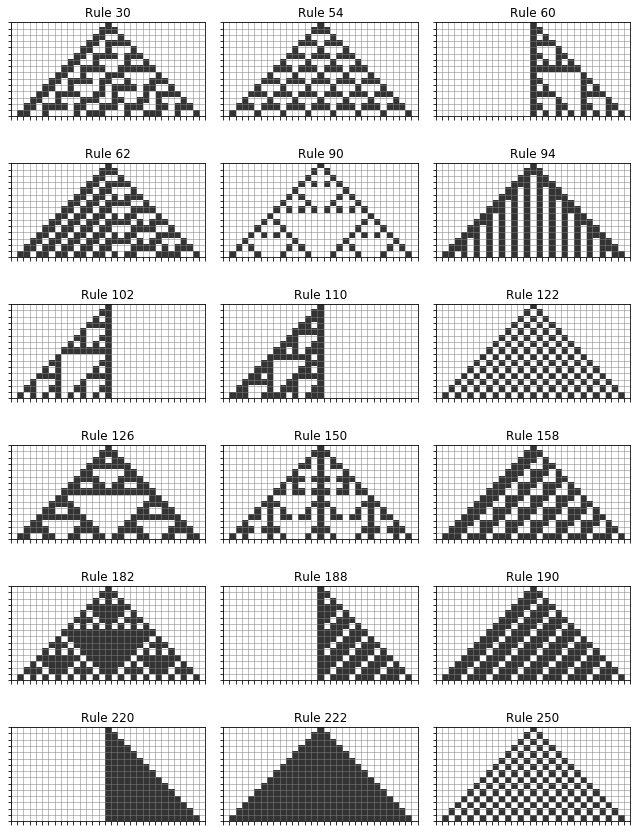

In [25]:
niter = 15
width = niter*2+1
init = np.zeros(width, 'int')
init[width//2] = 1
rules = np.array([30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
                  150, 158, 182, 188, 190, 220, 222, 250]).reshape((-1, 3))

ncols = width
make_plots(rules, niter)